# The Shape of Orbits in the Schwarzschild Geometry
Based on https://web.physics.ucsb.edu/~gravitybook/math/schorbits.pdf.

In [99]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
import scipy.integrate as integrate

### Variables to set

In [100]:
signewt = 1 # multiplies the non-newtonian 1/r³ term in the potential
            # set to 1 for GR and 0 for Newton

l = 5       # angular momentum

E = -0.01   # energy parameter

rst = 20    # starting radius for an orbit which is not bound

norbit = 3  # number of orbits to be computed if the orbit is bound


**Make sure these parameters are set so the orbit is classically allowed and doesn't start at a position where the value of the effective potential is greater than ``E``.**

### The potential

In [101]:
# Effective potential V_eff
V = lambda u: -u + l**2 * u**2 / 2 - signewt * l**2 * u**3

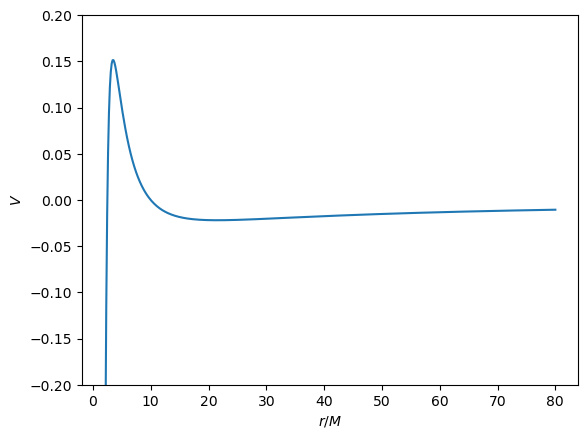

In [102]:
# Plot V_eff
r = np.linspace(2, 80, 500)
plt.plot(r, V(1/r))
plt.xlabel("$r/M$")
plt.ylabel("$V$")
plt.ylim(-0.2, 0.2)
plt.show()

In [103]:
dV = lambda u: -1 + l**2 * u - 3*signewt * l**2 * u**2
maxmin = fsolve(dV, x0 = [0, 100])
maxmin

array([0.04648162, 0.28685171])

In [104]:
vmin = V(maxmin[0])
vmax = V(maxmin[1])
vmin, vmax

(-0.021985493668577518, 0.15161512329820714)

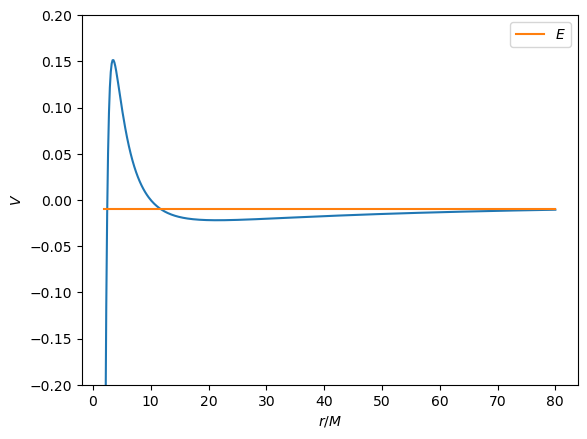

In [105]:
# Plot V_eff and E
r = np.linspace(2, 80, 500)
plt.plot(r, V(1/r))
plt.plot(r, E*np.ones_like(r), label="$E$")
plt.xlabel("$r/M$")
plt.ylabel("$V$")
plt.ylim(-0.2, 0.2)
plt.legend()
plt.show()

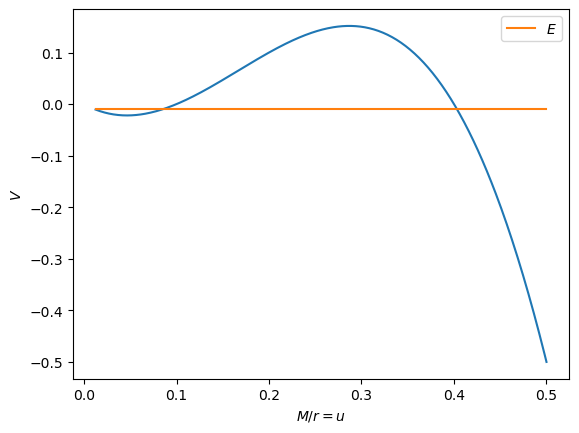

In [106]:
# Plot V_eff and E using u
u = np.linspace(1/80, 1/2, 500)
plt.plot(u, V(u))
plt.plot(u, E*np.ones_like(u), label="$E$")
plt.xlabel("$M/r = u$")
plt.ylabel("$V$")
plt.legend()
plt.show()

In [107]:
# Note: needs initial guesses based on the graph above
tp1, tp2, tp3 = fsolve((lambda x: E - V(x)), x0 = [0, 0.08, 100])
tp1, tp2, tp3

(0.011659741119382182, 0.08506961684645613, 0.4032706420341376)

### Computing the orbit

In [108]:
ust = 1/rst
eps = 1e-8

# Bound orbits
testa = (E < 0) and (ust < tp2)
if testa:
    u1 = tp1*(1+eps)
    u2 = tp2*(1-eps)

# Orbits coming from and going to infinity
testb = (E > 0) and (E < vmax) and (ust < tp2)
if testb:
    u1 = ust
    u2 = tp2 * (1-eps)
    while E-V(u2) < 0:
        u2 -= eps*tp2

# Orbits which start from r=2M and go back to it
testc = (E < vmax) and (ust > tp3)
if testc:
    u1 = 0.5
    u2 = tp3 * (1+eps)

# Plunge orbits coming from infinity going to r=2M
testd = E > vmax
if testd:
    u1 = ust
    u2 = 0.5 * (1 - eps)

print(testa, testb, testc, testd)
print(u1, u2)

assert testa or testb or testc or testd

True False False False
0.011659741235979593 0.08506961599575996


If the parameters are set correctly, only one of the four options above should be ``True``.

In [109]:
def theta(u_array, E, l, u1):
    """Angle phi swept out from the innermost turning point."""
    result = []
    for u in u_array:
        integrated =  integrate.quad(
            lambda w: (l / 2**(1/2)) * (E-V(w))**(-1/2),
            u1, u
        )
        result.append(integrated[0])
    return np.array(result)

In [110]:
delphi = theta([u2], E, l, u1)  # total angle phi swept out between two endpoints of the orbit
delphi

array([3.7364008])

In [111]:
# z is a parameter which varies from 0 to norbit
n = lambda z: np.floor(z).astype(int)
zf = lambda z: z % 1
ua = lambda z: u1 * (1 - 2*zf(z)) + u2 * 2 * zf(z)
ub = lambda z: u1 * (2*zf(z) - 1) + 2 * u2 * (1-zf(z))
u = lambda z: np.where(zf(z) < 0.5, ua(z), ub(z))
phia = lambda z: 2*(n(z)) * delphi + theta(u(z), E, l, u1)
phib = lambda z: 2*(n(z)+1) * delphi - theta(u(z), E, l, u1)
accphi = lambda z: np.where(zf(z) < 0.5, phia(z), phib(z))      # accumulated angle as a function of position along the orbit
x = lambda z: np.cos(accphi(z)) / u(z)
y = lambda z: np.sin(accphi(z)) / u(z)

### Displaying the results

In [112]:
if testa:
    norbit = norbit
elif testd:
    norbit = 0.5
else:
    norbit = 1
norbit

3

C:\Users\quint\AppData\Local\Temp\ipykernel_4564\3400225586.py:5: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  integrated =  integrate.quad(


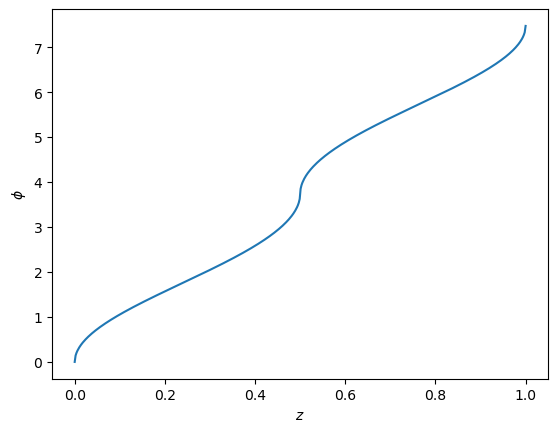

In [113]:
if norbit > 1:
    z = np.linspace(0, 1, 500)
    plt.plot(z, accphi(z))
    plt.xlabel("$z$")
    plt.ylabel("$\\phi$")
    plt.show()

C:\Users\quint\AppData\Local\Temp\ipykernel_4564\3400225586.py:5: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  integrated =  integrate.quad(


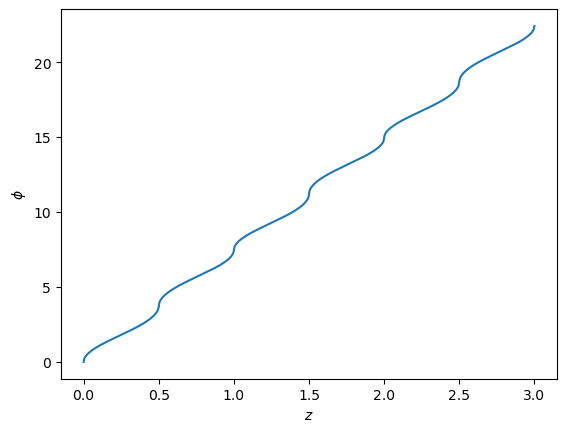

In [114]:
z = np.linspace(0, norbit, 500)
plt.plot(z, accphi(z))
plt.xlabel("$z$")
plt.ylabel("$\\phi$")
plt.show()

C:\Users\quint\AppData\Local\Temp\ipykernel_4564\3400225586.py:5: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  integrated =  integrate.quad(


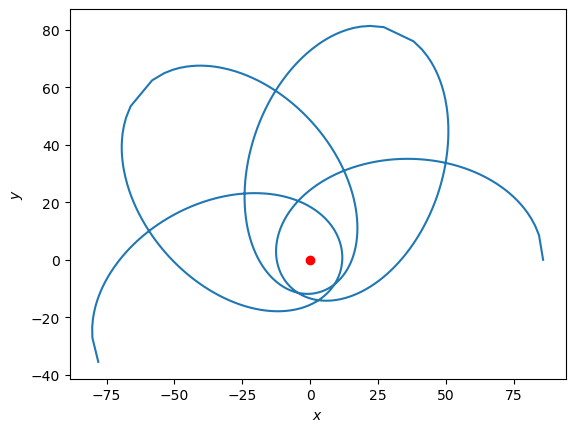

In [115]:
t = np.linspace(0, norbit, 3000)    # crank up this last value for smoother curves
plt.plot(x(t), y(t))
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.plot(0, 0, "ro")
plt.show()